## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [2]:
corpus_name = "/Users/raychanan/Downloads/TV" 
# corpus_name = "Movies"

In [3]:
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

In [4]:
TV_raw = loadcorpus(corpus_name)

text_13_idi.zip
text_16_qll.zip
text_32_ldf.zip
text_19_gvc.zip
text_09_jex.zip
text_05_nko.zip
text_17_arp.zip
text_01_ote.zip
text_28_rfy.zip
text_31_akv.zip
text_22_etp.zip
text_11_uoy.zip
text_14_lnc.zip
text_06_eyp.zip
text_08_loh.zip
text_33_kje.zip
text_30_wkp.zip
text_07_oma.zip
text_03_mnq.zip
text_21_fqa.zip
text_29_oye.zip
text_27_fle.zip
text_23_fmh.zip
text_12_rcq.zip
text_00_myn.zip
text_10_aoy.zip
text_04_mlq.zip
text_20_cde.zip
text_02_mqu.zip
text_26_ngj.zip
text_24_ywo.zip
text_18_jfj.zip
text_25_byg.zip
text_15_guo.zip


In [5]:
print(TV_raw.keys())

dict_keys(['13.txt', '16.txt', '32.txt', '19.txt', '09.txt', '05.txt', '17.txt', '01.txt', '28.txt', '31.txt', '22.txt', '11.txt', '14.txt', '06.txt', '08.txt', '33.txt', '30.txt', '07.txt', '03.txt', '21.txt', '29.txt', '27.txt', '23.txt', '12.txt', '00.txt', '10.txt', '04.txt', '20.txt', '02.txt', '26.txt', '24.txt', '18.txt', '25.txt', '15.txt'])


In [6]:
TV_raw['02.txt'][0:2]

[b'\r\n',
 b"@@6409139 [theme_music_plays] coughs , wheezes [man_over_PA] Flight deck to Chief Guard . We 'll be making an Earth orbit pass in five minutes . Prepare for landing . Yes , sir . [computer_whirring] Come on . Let 's check the prisoners . Your attention and look this way ! ln a few minutes , we 'll be making an Earth entry . ln ten , you 'll be getting out of your bunks and moving through the Liberty Corridor . Now , you 've all been good boys so far . We 've had a nice trip . But until you get your discharge papers , let me remind you of one thing ... You are still convicts ! Which means that we do n't want any trouble in our last minutes together . I want no demonstrations , no cracks about the Interstellar Prison Service once we 've landed , no sneaky tricks of any kind . Because if you 've got anything like that in mind , there 's me , there 's my friend and there are these prods . Most of you have had a tickle or two from them . So you know what I @ @ @ @ @ @ @ @ @ @ o

In [7]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            # !!!!!!!!!
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [8]:
clean_02 = clean_raw_text(TV_raw['02.txt'])

In [9]:
clean_02[:2]

['\r\n',
 "@@6409139 [theme_music_plays] coughs , wheezes [man_over_PA] Flight deck to Chief Guard . We'll be making an Earth orbit pass in five minutes . Prepare for landing . Yes , sir . [computer_whirring] Come on . Let's check the prisoners . Your attention and look this way ! ln a few minutes , we'll be making an Earth entry . ln ten , you'll be getting out of your bunks and moving through the Liberty Corridor . Now , you've all been good boys so far . We've had a nice trip . But until you get your discharge papers , let me remind you of one thing ... You are still convicts ! Which means that we don't want any trouble in our last minutes together . I want no demonstrations , no cracks about the Interstellar Prison Service once we've landed , no sneaky tricks of any kind . Because if you've got anything like that in mind , there's me , there's my friend and there are these prods . Most of you have had a tickle or two from them . So you know what I @ @ @ @ @ @ @ @ @ @ one another . 

In [10]:
nlp = spacy.load("en")

In [11]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [12]:
word_tokenize(clean_02[1])

['@@6409139',
 'theme_music_plays',
 'coughs',
 'wheezes',
 'man_over_PA',
 'Flight',
 'deck',
 'to',
 'Chief',
 'Guard',
 'We',
 "'ll",
 'be',
 'making',
 'an',
 'Earth',
 'orbit',
 'pass',
 'in',
 'five',
 'minutes',
 'Prepare',
 'for',
 'landing',
 'Yes',
 'sir',
 'computer_whirring',
 'Come',
 'on',
 'Let',
 "'s",
 'check',
 'the',
 'prisoners',
 'Your',
 'attention',
 'and',
 'look',
 'this',
 'way',
 'ln',
 'a',
 'few',
 'minutes',
 'we',
 "'ll",
 'be',
 'making',
 'an',
 'Earth',
 'entry',
 'ln',
 'ten',
 'you',
 "'ll",
 'be',
 'getting',
 'out',
 'of',
 'your',
 'bunks',
 'and',
 'moving',
 'through',
 'the',
 'Liberty',
 'Corridor',
 'Now',
 'you',
 "'ve",
 'all',
 'been',
 'good',
 'boys',
 'so',
 'far',
 'We',
 "'ve",
 'had',
 'a',
 'nice',
 'trip',
 'But',
 'until',
 'you',
 'get',
 'your',
 'discharge',
 'papers',
 'let',
 'me',
 'remind',
 'you',
 'of',
 'one',
 'thing',
 'You',
 'are',
 'still',
 'convicts',
 'Which',
 'means',
 'that',
 'we',
 'do',
 "n't",
 'want',
 'a

In [13]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [14]:
counted_words = wordCounter(word_tokenize(clean_02[1]))
counted_words[:10]

,word,count
0,@@6409139,1
1,theme_music_plays,1
2,coughs,1
3,wheezes,1
4,man_over_pa,3
5,flight,1
6,deck,1
7,to,191
8,chief,2
9,guard,1


In [15]:
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
counted_words.sort_values('count', ascending=False, inplace=True)
counted_words[:20]

,word,count
45,you,329
88,i,313
32,the,206
7,to,191
124,it,161
79,that,141
41,a,121
36,and,120
30,'s,98
81,n't,96


In [16]:
import nltk

In [17]:
TV_tokens = word_tokenize(clean_02[1])
TV_tokens[10:30]

['We',
 "'ll",
 'be',
 'making',
 'an',
 'Earth',
 'orbit',
 'pass',
 'in',
 'five',
 'minutes',
 'Prepare',
 'for',
 'landing',
 'Yes',
 'sir',
 'computer_whirring',
 'Come',
 'on',
 'Let']

In [24]:
TV_text = nltk.Text(TV_tokens)
TV_text_Index = nltk.text.ConcordanceIndex(TV_text) 
TV_text_Index.print_concordance('interesting')

Displaying 3 of 3 matches:
h I think you 'd find a talk very interesting doorbell_ringing door_whirs Hello
roposal One I think you will find interesting What 's that Listen carefully and
While the others That 's all very interesting For my peace of mind I wish I cou


In [28]:
TV_text.common_contexts(['I'])

what_have nick_'m yes_'m too_will but_'ve difference_'ll now_'m
look_'m and_'ll but_'m see_have nick_was me_would that_'ve but_could
and_have but_do and_worked that_have together_want


In [34]:
TV_text.count('me') + TV_text.count('I')

386

In [35]:
TV_text.count('you') + TV_text.count('You')

329

In [36]:
TV_text.count('we') + TV_text.count('We') + TV_text.count('us')

60

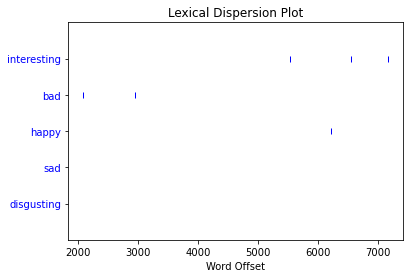

In [38]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
TV_text.dispersion_plot(['interesting','bad', 'happy', 'sad' ,'disgusting'])
sns.set() #Re-enabling seaborn